# Problem Set 3- Question 1
By Preethi Susan Abraham

1. Generate a quadratic model with y=x+x2+e. x and e are both vectors which are normal mean 0, variance 1. Generate a monte-carlo sample from this model with length m = 20. Use the functions train_test_split() to get training and test sets where the test set is 1/2 of the full sample size, m. Fit three different models, a linear model, a quadratic model, and a 7 degree polynomial. (Use PolynomialFeatures() function for this.) Fit the three models to the training set and report their performance with R-squared on both the train and test sets. Hint: In this problem you are only generating one sample of length 20. Similar to the example from class, except now you have a quadratic term too.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(10)

In [2]:
def rsquared(y,yhat,ytrain):
    RSS = np.sum( (y-yhat)**2)
    yhatNaive = np.mean(ytrain)
    naiveRSS = np.sum( (y-yhatNaive)**2)
    rs = 1. - RSS/naiveRSS
    return rs

# Model 1: Linear Model (y=X+e)

Intercept, coefficient:
[array([0.25995179]), array([[0.70384945]])]


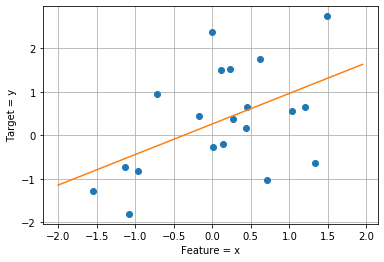

In [3]:
#Linear Model (y=X+e)

m=20
n=1

X = np.random.normal(size=(m,n),loc=0,scale=1.)
e = np.random.normal(size=(m,1),loc=0,scale=1.)
y = X + e #Linear Model

lr = LinearRegression(fit_intercept=True)#Linear Regression
lr.fit(X, y) #fitting the model

xfeature = np.arange(start=-2.0,stop=2.0,step=0.05)
xf = xfeature.reshape(len(xfeature),1) #converting to matrix form

#Prediction
yhat = lr.predict(xf)
# plot data
plt.plot(X,y,"o")
# plot regression line (target predictions)
plt.plot(xf,yhat)
plt.xlabel("Feature = x")
plt.ylabel("Target = y")
plt.grid()

print("Intercept, coefficient:")
print([lr.intercept_,lr.coef_])

In [4]:
#R squared value
print("Full sample R-square:")
print(lr.score(X,y))

Full sample R-square:
0.2416695155657037


In [5]:
#Same as above but with created function 'rsquared'

yhat = lr.predict(X)
# Send in y itself as training data 
# In this case test = train
rsq = rsquared(y,yhat,y)
print(rsq)

0.2416695155657037


In [6]:
#Training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
# Now run regression on training data 
lr.fit(X_train, y_train)


# First rsquared by hand with function
yhat_train = lr.predict(X_train)
yhat_test  = lr.predict(X_test)

# R-squared (my version using training data for sample mean)
rsq_train = rsquared(y_train,yhat_train,y_train)
rsq_test  = rsquared(y_test, yhat_test, y_train)

# R-squared (scikit learn version, using test data for sample mean)
rsq_train = rsquared(y_train,yhat_train,y_train)
rsq_test  = rsquared(y_test, yhat_test, y_test)

print("Train/test R-squares: (scikit-learn version)")
print(rsq_train)
print(rsq_test)

# Print R-square values on training and test data
print("Train/test R-squares: (scikit-learn versions)")
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

Train/test R-squares: (scikit-learn version)
0.508655237064873
-0.3844957310512862
Train/test R-squares: (scikit-learn versions)
0.508655237064873
-0.3844957310512862


# Model 2: Quadratic Model (y=X+X^2+e)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

X dimensions
(20, 2)
R squared for quadratic model= 0.2994469137718183


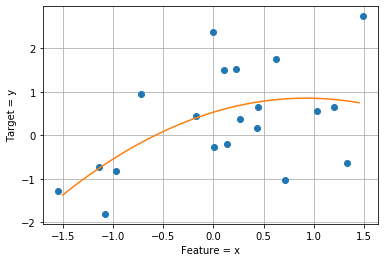

In [8]:
poly = PolynomialFeatures(degree=2,include_bias=False)
Xquadratic = poly.fit_transform(X)
print("X dimensions")
print(Xquadratic.shape)
# Fit regression
lr.fit(Xquadratic,y)
# Set X's for forecasting
xfeature = np.arange(start=-1.5,stop=1.5,step=0.05)
# Turn them into a matrix
xf = xfeature.reshape(len(xfeature),1)
# Add powers of X
xfeaturePoly = poly.fit_transform(xf)
yhat = lr.predict(xfeaturePoly)
# plot data
plt.plot(X,y,'o')
# plot features
plt.plot(xfeature,yhat)
plt.xlabel("Feature = x")
plt.ylabel("Target = y")
plt.grid()
# Report in sample performance of polynomial
print('R squared for quadratic model=',lr.score(Xquadratic,y))

In [9]:
#Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
Xquad_train = poly.fit_transform(X_train)
Xquad_test  = poly.fit_transform(X_test)
lr.fit(Xquad_train,y_train)
print('Train R-square for Quadratic Model=',lr.score(Xquad_train,y_train))
print('Test R-square for Quadratic Model',lr.score(Xquad_test,y_test))

Train R-square for Quadratic Model= 0.40603267365784756
Test R-square for Quadratic Model -0.13976744342212855


# Model 3: Polynomial Model (degree 7)

X dimensions
(20, 7)
R squared for polynomial model of degree 7= 0.5438824894853835


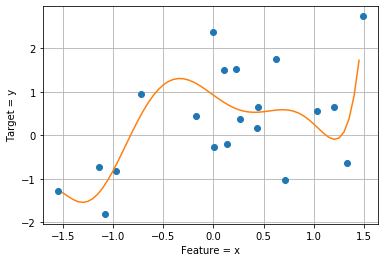

In [10]:
poly1 = PolynomialFeatures(degree=7,include_bias=False)
Xpoly = poly1.fit_transform(X)
print("X dimensions")
print(Xpoly.shape)
# Fit regression
lr.fit(Xpoly,y)
# Set X's for forecasting
xfeature = np.arange(start=-1.5,stop=1.5,step=0.05)
# Turn them into a matrix
xf = xfeature.reshape(len(xfeature),1)
# Add powers of X
xfeaturePoly = poly1.fit_transform(xf)
yhat = lr.predict(xfeaturePoly)
# plot data
plt.plot(X,y,'o')
# plot features
plt.plot(xfeature,yhat)
plt.xlabel("Feature = x")
plt.ylabel("Target = y")
plt.grid()
# Report in sample performance of polynomial
print('R squared for polynomial model of degree 7=',lr.score(Xpoly,y))

In [11]:
#Training and Testing:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
Xpoly_train = poly1.fit_transform(X_train)
Xpoly_test  = poly1.fit_transform(X_test)
lr.fit(Xpoly_train,y_train)
print('Train R-square for Polynomial Model of degree 7=',lr.score(Xpoly_train,y_train))
print('Test R-square for Polynomial Model of degree 7=',lr.score(Xpoly_test,y_test))

Train R-square for Polynomial Model of degree 7= 0.9514279455516594
Test R-square for Polynomial Model of degree 7= -763328.7563570915
